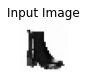

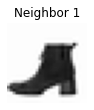

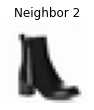

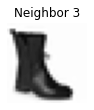

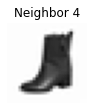

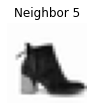

In [1]:
import cv2
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset (replace this with your actual dataset loading code)
def load_dataset(address):
    data = pd.read_csv(address)
    labels = data['label'].tolist()
    # Extract pixel values for all images in the dataset
    dataset = data.iloc[:, 1:].astype(int).values.tolist()
    # Each element in 'dataset' should be a list of pixel values for one image.
    return dataset, labels

def extract_features(image):
    # Convert the image to 8-bit if it's not already
    if image.dtype != np.uint8:
        image = cv2.convertScaleAbs(image)

    # Assume single-channel image (grayscale)
    hist = cv2.calcHist([image], [0], None, [8], [0, 256])

    return hist.flatten()

# Choose an input image (replace this with your actual input image)
input_image = cv2.imread(r'Test\Ankle Boot\1001.jpg', cv2.IMREAD_GRAYSCALE)
# Resize the input image to (28, 28)
input_image = cv2.resize(input_image, (28, 28))
input_features = extract_features(input_image)

# Proses classification

# Load dataset and extract features
dataset, labels = load_dataset(r'EachLabel\Ankle Boot.csv') # load dataset based on the result from classification (example the result is ankle boot)
features = [extract_features(np.array(img).reshape(28, 28)) for img in dataset]

# Convert the list of features to a numpy array
X = np.array(features)

# Create a Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_model.fit(X)


# Reshape input features to match the shape of the training features
input_features = input_features.reshape(1, -1)

# Find the k nearest neighbors
distances, indices = knn_model.kneighbors(input_features)

# Display the input image
plt.subplot(1, 6, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Display the k-nearest neighbor images
for i in range(5):
    neighbor_index = indices[0, i]
    neighbor_image = dataset[neighbor_index]
    plt.figure(figsize=(10,8))
    plt.subplot(1, 6, i + 2)
    plt.imshow(np.array(neighbor_image).reshape(28, 28), cmap='gray')
    plt.title(f'Neighbor {i + 1}')
    plt.axis('off')

plt.show()


In [2]:
indices

array([[48,  0, 33, 39, 50]], dtype=int64)

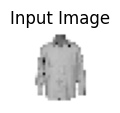

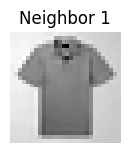

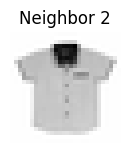

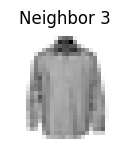

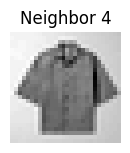

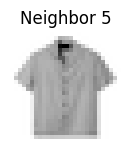

In [1]:
import cv2
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
# Load your dataset (replace this with your actual dataset loading code)
def load_dataset(address, result):
    data = pd.read_csv(address,index_col=0)
    data = data[data.loc[:, 'label'] == result]
    labels = data['label'].tolist()
    # Extract pixel values for all images in the dataset
    dataset = data.iloc[:, 1:].astype(int).values.tolist()
    # Each element in 'dataset' should be a list of pixel values for one image.
    return dataset, labels

def extract_features(image):
    # Convert the image to 8-bit if it's not already
    if image.dtype != np.uint8:
        image = cv2.convertScaleAbs(image)

    # Assume single-channel image (grayscale)
    hist = cv2.calcHist([image], [0], None, [8], [0, 256])

    return hist.flatten()

def extract_features_cnn(image):
    if isinstance(image, str):
        # Load the image using OpenCV if the input is a file path
        loaded_image = cv2.imread(image)
        if loaded_image is None:
            print(f"Warning: Unable to load image from path: {image}")
            return np.zeros(4096)  # Replace with an appropriate default value
        image = loaded_image
        # Resize the image to the input size expected by VGG16 (224x224)
        image = cv2.resize(image, (224, 224))
    elif isinstance(image, list):  # Assuming the input is a list of pixel values
        # Convert the list to a numpy array
        image = np.array(image).reshape(28, 28, 1)  # Assuming the image size is 28x28
        # Resize the image to the input size expected by VGG16 (224x224)
        image = cv2.resize(image, (224, 224))
    elif isinstance(image, np.ndarray):
        # Ensure the input image is in the correct format
        image = cv2.resize(image, (224, 224))
    else:
        print("Warning: Invalid input type. Supported types: str (image path), list (pixel values), or np.ndarray (image array)")
        return np.zeros(4096)  # Replace with an appropriate default value

    # Expand dimensions to create a batch for the model
    image = np.expand_dims(image, axis=0)

    # Preprocess the image for the VGG16 model
    image = preprocess_input(image)

    # Load the pre-trained VGG16 model
    base_model = VGG16(weights='imagenet')

    # Remove the last layer to obtain features before classification
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

    # Extract features
    features = model.predict(image)

    # Flatten the features
    flattened_features = features.flatten()

    return flattened_features


# input_image_path = r'Test\Shirt\301.jpg'
# input_features = extract_features_cnn(input_image_path)

# Choose an input image (replace this with your actual input image)
input_image = cv2.imread(r'Test\Shirt\301.jpg', cv2.IMREAD_GRAYSCALE)
# Resize the input image to (28, 28)
input_image = cv2.resize(input_image, (28, 28))
input_features = extract_features(input_image)

# Proses classification
result = 6
# Load dataset and extract features
dataset,label = load_dataset(r'Dataset\Dataset_Fashion(11-Label).csv',result)


# dataset, labels = load_dataset(r'EachLabel\Shirt.csv') # load dataset based on the result from classification (example the result is ankle boot)
features = [extract_features(np.array(img).reshape(28, 28)) for img in dataset]
# features = [extract_features_cnn(img) for img in dataset]
# features = [extract_features(np.array(img).reshape(28, 28)) for img in dataset if len(img) > 1 and len(img) >= 28*28]


# Convert the list of features to a numpy array
X = np.array(features)

# Ensure X is 2D
X = X.reshape(-1, 1) if X.ndim == 1 else X

# Create a Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_model.fit(X)


# Reshape input features to match the shape of the training features
input_features = input_features.reshape(1, -1)

# Find the k nearest neighbors
distances, indices = knn_model.kneighbors(input_features)

# Display the input image
plt.subplot(1, 6, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Display the k-nearest neighbor images
for i in range(5):
    neighbor_index = indices[0, i]
    neighbor_image = dataset[neighbor_index]
    plt.figure(figsize=(10,8))
    plt.subplot(1, 6, i + 2)
    plt.imshow(np.array(neighbor_image).reshape(28, 28), cmap='gray')
    plt.title(f'Neighbor {i + 1}')
    plt.axis('off')

plt.show()


In [26]:
# Load dataset and extract featuress

def load_dataset(address, result):
    data = pd.read_csv(address)
    data = data[data.loc[:, 'label'] == result]
    labels = data['label'].tolist()
    # Extract pixel values for all images in the dataset
    dataset = data.iloc[:, :].astype(int).values.tolist()
    # Each element in 'dataset' should be a list of pixel values for one image.
    return dataset, labels
dataset,label = load_dataset(r'Dataset\Dataset_Fashion(10-Label).csv',result)
dataset

[[600,
  6,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  254,
  254,
  249,
  196,
  183,
  177,
  184,
  247,
  254,
  254,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  254,
  255,
  255,
  208,
  146,
  158,
  151,
  127,
  203,
  255,
  255,
  254,
  254,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  254,
  255,
  255,
  248,
  219,
  178,
  174,
  165,
  162,
  169,
  169,
  212,
  244,
  255,
  255,
  254,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  250,
  219,
  192,
  186,
  169,
  149,
  165,
  167,
  155,
  149,
  174,
  190,
  210,
  243,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_performance(model, image_paths, ground_truth_features):
    predicted_features = [feature_extraction(img_path, model) for img_path in image_paths]
    similarities = [cosine_similarity([predicted_feature], [ground_truth_feature])[0, 0] for predicted_feature, ground_truth_feature in zip(predicted_features, ground_truth_features)]

    # Example: Calculate accuracy
    correct_predictions = sum(similarity > threshold for similarity in similarities)
    accuracy = correct_predictions / len(similarities)

    return accuracy

# Example usage
model = your_pretrained_model  # Replace with the actual model
image_paths = your_image_paths  # Replace with the paths to your images
ground_truth_features = your_ground_truth_features  # Replace with the ground truth features

accuracy = evaluate_performance(model, image_paths, ground_truth_features)
print(f"Accuracy: {accuracy}")


In [20]:
print(np.array(neighbor_image).shape)

(785,)
